In [28]:
#Logisticka Regresia
#V prvej casti sa mnozina dat delin stratifikovane no nevyuzivam metodu SMOTE
#Neskor v druhej casti pouzijem metodu SMOTE a opat aplikujem algoritmus Logisticka Regresia

In [29]:
#nacitanie kniznic
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()
sns.set_style("darkgrid")

In [31]:
#Nacitanie datasetu
data = pd.read_csv("DATA/student_prediction.csv")
#Zobrazenie hlavicky datasetu
data.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [32]:
#Vymazanie stlpca STUDENTID
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [33]:
#Zobrazenie hlavicky dataseti po premazani stlpca STUDNTID
data.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [34]:
#Vyvorenie premennej x a y pricom x su predikujuce atributu a y je predikovany atribut GRADE
x = data.drop(['GRADE'], axis = 1)
y = data['GRADE']


In [35]:
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)

In [36]:
#Vyvorenie  modelu 
model = LogisticRegression(solver='liblinear', random_state=0)

In [37]:
#Natrenovanie vytvoreneho modelu 
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [38]:
#Vytvorenie premenej pred, ktora obsahuje predikovane hodnoty
pred = model.predict(X_test)

In [39]:
model.score(X_train, y_train)


0.7326732673267327

In [40]:
#Vypis kontingencnej tabulky

table = pd.crosstab(pred, y_test)
table

GRADE,0,1,2,3,4,5,6,7
row_0,,,,,,,,
1,2,4,1,4,0,1,0,0
2,1,2,1,0,1,0,1,0
3,0,3,1,1,1,1,0,1
4,0,1,1,0,0,0,1,0
5,0,1,2,1,1,0,0,1
6,0,0,1,0,0,3,0,1
7,0,0,0,0,0,0,2,2


In [41]:
#vypis klasifikacneho reportu

print(classification_report( y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.36      0.35        11
           2       0.17      0.14      0.15         7
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.50      0.40      0.44         5

    accuracy                           0.18        44
   macro avg       0.14      0.13      0.14        44
weighted avg       0.18      0.18      0.18        44



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC for Class 1: 0.7073170731707317
AUC for Class 2: 0.6721763085399448
AUC for Class 3: 0.6486486486486486
AUC for Class 4: 0.5175438596491229
AUC for Class 5: 0.3333333333333333
AUC for Class 6: 0.6051282051282052
AUC for Class 7: 0.58125
AUC for Class 8: 0.8205128205128205


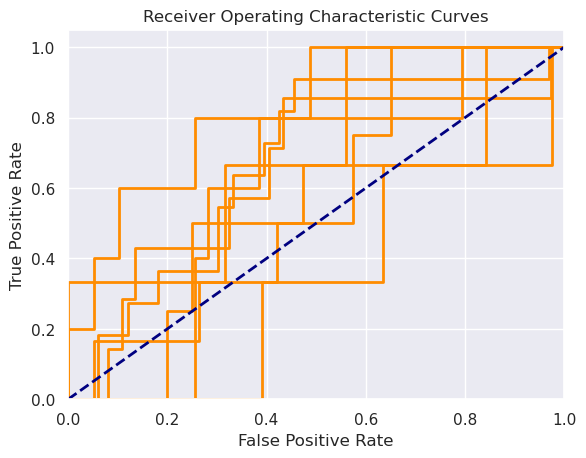

In [42]:
#Graficke zobraznie a ciselne zobrazenie hodnot AUC
y_score = model.predict_proba(X_test)

from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1, 2, 3, 4, 5, 6,7])
n_classes = y_test_bin.shape[1]

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Class=1, n=35 (24.138%)
Class=2, n=24 (16.552%)
Class=5, n=17 (11.724%)
Class=0, n=8 (5.517%)
Class=3, n=21 (14.483%)
Class=4, n=10 (6.897%)
Class=7, n=17 (11.724%)
Class=6, n=13 (8.966%)


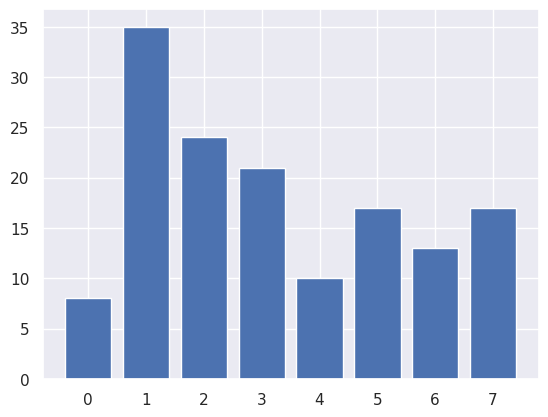

In [43]:
#Tu mozeme vidiet rozdelenie atributu GRADE, ktory je predikovany atribut
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
# ciselny vypis
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [44]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=1, n=35 (12.500%)
Class=2, n=35 (12.500%)
Class=5, n=35 (12.500%)
Class=0, n=35 (12.500%)
Class=3, n=35 (12.500%)
Class=4, n=35 (12.500%)
Class=7, n=35 (12.500%)
Class=6, n=35 (12.500%)


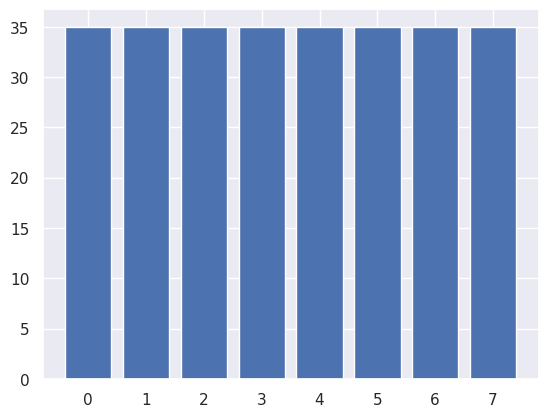

In [46]:
#Pouzitie metody SMOTE, ktora zabezpecila ze vsetky triedy mali rovnake mnozstvo poloziek
y = LabelEncoder().fit_transform(y)
# transformacia datasetu
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# ciselny vypis distribucie hodnot
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [47]:
#Opat stratifikovane rozdelenie mnoziny na trenovaciu a testovaciu
x_train, x_test, Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify = y)

In [48]:
#Vytvorenie modelu 2
model2 = LogisticRegression(solver='liblinear', random_state=0)

In [49]:
#Natrenovanie modelu 2
model2.fit(x_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [50]:
##Vytvorenie premenej pred2, ktora obsahuje predikovane hodnoty
pred2 = model2.predict(x_test)

In [51]:
#Vypis kontingencnej tabulky
table = pd.crosstab( pred2, Y_test)
table

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,8,1,0,1,0,0,0,1
1,0,2,4,2,0,0,2,2
2,0,2,2,0,1,1,0,0
3,2,1,0,5,0,0,0,0
4,1,1,0,0,9,0,0,2
5,0,0,2,3,0,9,1,0
6,0,3,2,0,0,1,6,1
7,0,0,0,0,1,0,1,4


In [52]:
#Vypis klasifikacneho reportu
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.17      0.20      0.18        10
           2       0.33      0.20      0.25        10
           3       0.62      0.45      0.53        11
           4       0.69      0.82      0.75        11
           5       0.60      0.82      0.69        11
           6       0.46      0.60      0.52        10
           7       0.67      0.40      0.50        10

    accuracy                           0.54        84
   macro avg       0.53      0.53      0.52        84
weighted avg       0.54      0.54      0.53        84

